In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("DATE+WL+WEATHER.csv")

data_visualize

,plant_date,DoY,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),(delta)PD
0,0.2083,237.2083,53,208,87,36,44,0,21.9,97,-0.1
1,0.4583,237.4583,59,62,93,36,50,113,22.3,100,-0.1
2,0.6250,237.6250,60,61,93,36,56,152,22.8,100,-0.1
3,0.6667,237.6667,58,60,91,36,51,141,23.3,100,-0.1
4,0.7083,237.7083,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...,...,...
407,40.8750,277.8750,39,42,42,36,44,0,14.5,93,-0.1
408,41.0000,278.0000,39,42,42,36,44,0,13.9,99,-0.1
409,41.0833,278.0833,39,42,42,36,44,0,14.4,100,-0.1
410,41.2083,278.2083,39,42,42,36,44,0,14.6,98,-0.1


In [3]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 100000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [4]:
data = np.loadtxt("DATE+WL+WEATHER_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [5]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w1:
 [[-0.04727755]
 [ 0.14592174]
 [-0.46185532]
 [-0.02362492]
 [-0.47048524]
 [-0.10203058]
 [-0.34627897]
 [-0.00677055]
 [-0.63058066]
 [-0.49588117]] 
 w2:
 [[-0.14998841]
 [-0.32646343]
 [ 0.19432892]
 [-0.66208845]
 [-0.5342905 ]
 [-0.20529073]
 [-0.30162042]
 [-0.4495761 ]
 [-0.08886948]
 [-0.48990166]] 
 bias: -0.1792589 
 loss: 8179899.0 

step: 20000 
 w1:
 [[-4.7665894e-01]
 [ 3.9866764e-02]
 [-7.1033828e-02]
 [ 2.4029498e-01]
 [-1.5881788e-02]
 [-2.0863101e-01]
 [-1.1559838e-01]
 [-2.7947192e-04]
 [-6.4780974e-01]
 [-1.9475839e-01]] 
 w2:
 [[-0.5328126 ]
 [-0.384527  ]
 [ 0.38977376]
 [-0.53542906]
 [-0.26169664]
 [-0.2932956 ]
 [-0.21895891]
 [-0.6945845 ]
 [-0.09452382]
 [-0.29165703]] 
 bias: -0.1852604 
 loss: 99623.73 

step: 30000 
 w1:
 [[-3.4923423e-02]
 [ 4.3814145e-03]
 [-2.9043858e-03]
 [ 6.1692265e-03]
 [ 2.5689555e-03]
 [-4.8725605e-02]
 [-5.9654778e-03]
 [-7.5837779e-06]
 [-2.6114283e-02]
 [ 7.6738863e-05]] 
 w2:
 [[-0.35299993]
 [-0.4895209 ]


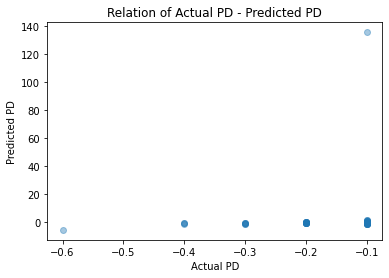

In [8]:
y_hat = tf.matmul(x_test * x_test, w1) + tf.matmul(x_test, w2) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [9]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 13.384829
MAE: 1.6802827
